In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from utils.neural_net import NeuralNetVol, ResNeuralNetVol, ResNeuralNetVolSd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from utils.rough_vol import RoughVol

In [3]:
data = pd.read_csv('oxfordmanrealizedvolatilityindices.csv')

In [4]:
data.head()

,Unnamed: 0,Symbol,open_price,rk_twoscale,close_price,open_to_close,rv10_ss,rk_parzen,medrv,open_time,rv5,nobs,rv5_ss,rsv,rv10,bv,rk_th2,close_time,bv_ss,rsv_ss
0,2000-01-03 00:00:00+00:00,.AEX,675.67,0.000103,675.44,-0.000340,0.000178,0.000179,0.000050,90101.0,0.000130,1795.0,0.000130,0.000046,0.000178,0.000100,0.000102,163015.0,0.000100,0.000046
1,2000-01-04 00:00:00+00:00,.AEX,664.20,0.000199,642.25,-0.033606,0.000261,0.000423,0.000075,90416.0,0.000201,1785.0,0.000201,0.000147,0.000261,0.000207,0.000201,163016.0,0.000207,0.000147
2,2000-01-05 00:00:00+00:00,.AEX,633.37,0.000325,632.31,-0.001675,0.000714,0.000324,0.000166,90016.0,0.000491,1801.0,0.000491,0.000328,0.000714,0.000361,0.000345,163016.0,0.000361,0.000328
3,2000-01-06 00:00:00+00:00,.AEX,632.46,0.000218,624.21,-0.013130,0.000182,0.000219,0.000152,90016.0,0.000225,1799.0,0.000225,0.000116,0.000182,0.000258,0.000221,163002.0,0.000258,0.000116
4,2000-01-07 00:00:00+00:00,.AEX,628.93,0.000126,644.86,0.025013,0.000157,0.000155,0.000039,90046.0,0.000138,1798.0,0.000138,0.000048,0.000157,0.000130,0.000123,163016.0,0.000130,0.000048


In [5]:
spx_rkth2 = np.sqrt(data.query('Symbol==".BFX"').rk_th2.values)

In [6]:
nnet_model = ResNeuralNetVol(hiddenlayer=[])
roughvol_model = RoughVol(fit_period=200)

In [7]:
spx_rkth2.__len__()

5040

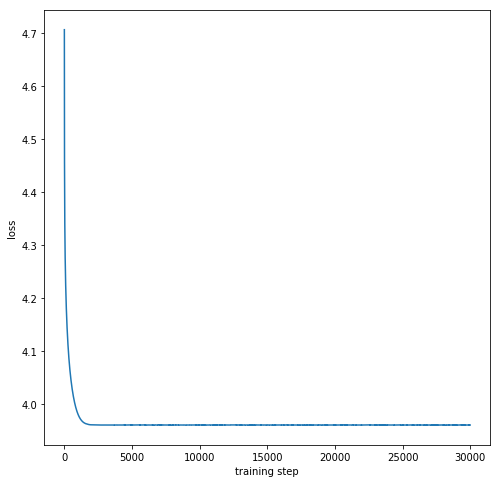

52.44875717163086

In [8]:
nnet_model.fit(spx_rkth2[:3000], draw_loss=True,steps=30000, lrs=[1e-3])

In [9]:
roughvol_model.fit(spx_rkth2[:3000])

0.1438050006463602

In [10]:
nnet_model.predict(spx_rkth2[3000:4000])

array([[0.00943305, 0.00840297, 0.00779692, ..., 0.00924314, 0.00844312,
        0.00850231],
       [0.00930303, 0.00857041, 0.00867642, ..., 0.00860537, 0.00859168,
        0.00786405],
       [0.00924909, 0.00934888, 0.00906489, ..., 0.00872823, 0.00796713,
        0.00857796],
       ...,
       [0.00892564, 0.00958092, 0.00909181, ..., 0.00829726, 0.00774076,
        0.00919373],
       [0.00954197, 0.00931217, 0.00919624, ..., 0.00768329, 0.00900535,
        0.00932362],
       [0.00935238, 0.0092889 , 0.00871801, ..., 0.0089892 , 0.00925021,
        0.00875202]])

In [11]:
result=[]
for i in tqdm(range(100)):
    forward = i+1
    roughvol_model.forward = forward
    result.append(roughvol_model.predict(spx_rkth2[3000:4000]))
roughvol_result = np.array(result).T

In [12]:
nnet_result=nnet_model.predict(spx_rkth2[3000:4000])

In [13]:
spx_rkth2[3200:4000]

array([0.01205725, 0.01127794, 0.00813977, 0.00967284, 0.0092205 ,
       0.01644455, 0.00957262, 0.00642937, 0.00882372, 0.00683999,
       0.0073604 , 0.00645389, 0.00693529, 0.00709518, 0.00529332,
       0.00444508, 0.00509397, 0.00637973, 0.00536881, 0.00709367,
       0.00695161, 0.00756873, 0.00597583, 0.00734908, 0.0063463 ,
       0.00590037, 0.00929083, 0.00637754, 0.0069824 , 0.0086599 ,
       0.00890418, 0.00859794, 0.00582095, 0.00600119, 0.00787681,
       0.00536519, 0.00670354, 0.00500209, 0.00700637, 0.0061335 ,
       0.0073201 , 0.00612486, 0.00495705, 0.00617628, 0.00622298,
       0.00657306, 0.00736205, 0.00804954, 0.00690276, 0.00707811,
       0.00774199, 0.00586969, 0.00537156, 0.00661178, 0.00508563,
       0.0059296 , 0.0064818 , 0.00645752, 0.00657698, 0.00524392,
       0.00538648, 0.00544528, 0.00559633, 0.00638267, 0.0074239 ,
       0.00660291, 0.00759839, 0.00536311, 0.00473525, 0.00618553,
       0.00545881, 0.00619941, 0.00532753, 0.00412157, 0.00714

In [14]:
roughvol_result.shape,  nnet_result.shape

((801, 100), (801, 100))

In [15]:
true_result = np.array([spx_rkth2[ele:ele+101] for ele in range(3199,4000)])

In [16]:
true_result.shape

(801, 101)

In [17]:
unconditional_var = np.mean((np.log(true_result[:,1:])-np.log(true_result[:,0][:,np.newaxis]))**2,axis=0)

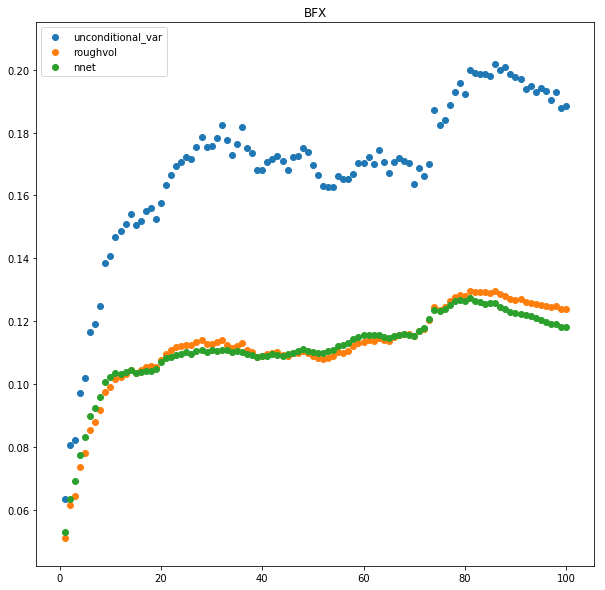

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(1,101),unconditional_var)
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0))
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0))
plt.title('BFX')
plt.legend(['unconditional_var', 'roughvol','nnet'])

In [19]:
np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0)

array([0.05111012, 0.0615539 , 0.06441026, 0.07361906, 0.07803816,
       0.08564477, 0.08796835, 0.09189051, 0.09759932, 0.09909858,
       0.10155825, 0.102361  , 0.10325778, 0.10451814, 0.10371866,
       0.10452729, 0.10544971, 0.10579474, 0.10560811, 0.10767573,
       0.10968097, 0.11078208, 0.11174229, 0.11209845, 0.11261888,
       0.11252499, 0.11344305, 0.1139577 , 0.11289655, 0.11296879,
       0.11358436, 0.11418778, 0.1126265 , 0.11139112, 0.11207104,
       0.11297946, 0.11077948, 0.11012073, 0.10865217, 0.10902261,
       0.10965215, 0.10998782, 0.11012693, 0.10941834, 0.10897085,
       0.10989691, 0.10996246, 0.1105165 , 0.1100071 , 0.10898535,
       0.10832149, 0.10794268, 0.10847166, 0.10891523, 0.11016534,
       0.11009868, 0.110593  , 0.11203739, 0.11312906, 0.11353325,
       0.11397663, 0.11372067, 0.11465261, 0.11397678, 0.11380475,
       0.11504988, 0.11567812, 0.11599561, 0.11608221, 0.11526954,
       0.11704964, 0.11750195, 0.12056777, 0.12446893, 0.12355

In [20]:
np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0)

array([0.05294994, 0.06363296, 0.06925236, 0.07759433, 0.08320631,
       0.08996232, 0.09235694, 0.09612089, 0.10089653, 0.10239186,
       0.10366348, 0.10336588, 0.10380137, 0.10452482, 0.1036622 ,
       0.10398813, 0.10420944, 0.10408296, 0.10489325, 0.10703924,
       0.10822863, 0.10875609, 0.10924865, 0.10958392, 0.11024504,
       0.10969043, 0.11058686, 0.11093627, 0.11042007, 0.11075895,
       0.11072968, 0.11087989, 0.11077132, 0.11026643, 0.11069398,
       0.11043325, 0.10975991, 0.10941893, 0.10871801, 0.10900701,
       0.10913347, 0.10970723, 0.10926813, 0.1090432 , 0.10954513,
       0.11010815, 0.11058668, 0.11110553, 0.11056063, 0.11036825,
       0.1098949 , 0.10991546, 0.11053322, 0.11106039, 0.11229538,
       0.11261641, 0.11301705, 0.11424736, 0.11516034, 0.11570854,
       0.11582846, 0.11575234, 0.11552624, 0.11489232, 0.11479507,
       0.11549888, 0.11563149, 0.11583777, 0.11570356, 0.11543677,
       0.11707323, 0.11789879, 0.12071456, 0.12348222, 0.12330